# Project - 2 -Advanced Computer Vision
### By Ajay Kumar

• DOMAIN: Entertainment

• CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. 
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the 
movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision 
and multimedia experts who need to detect faces from screen shots from the movie scene.

• DATA DESCRIPTION: The dataset comprises of images and its mask where there is a human face.

• PROJECT OBJECTIVE: Face detection from training images.

# PART ONE

In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q1. Import the dataset.

In [6]:
# Setting the project path
path = '/content/drive/MyDrive/AIML/DL/Adv Comp Project'
%cd '/content/drive/MyDrive/AIML/DL/Adv Comp Project'

/content/drive/MyDrive/AIML/DL/Adv Comp Project


In [7]:
!ls -l

total 1846654
-rw------- 1 root root      3344 Jul 15 17:43  generate_dataset.py
-rw------- 1 root root     52325 Jul 24 09:57 'Part 1Test Data - Prediction Image (1).jpeg'
-rw------- 1 root root 830916446 Jul 27 14:19 'Part 1- Train data - images.npy.zip'
-rw------- 1 root root 478756252 Jul 25 03:17 'Part 3 - Aligned Face Dataset from Pinterest.zip'
-rw------- 1 root root 580085408 Jul 25 03:16 'Part 3 - vgg_face_weights.h5'
-rw------- 1 root root     17840 Jul 27 14:06 'PART_ONE_Project - 2 -Advanced Computer Vision.ipynb'
-rw------- 1 root root   1099216 Jul 25 07:13 'PART_TWO_Project - 2 -Advanced Computer Vision (1).ipynb'
-rw------- 1 root root     32553 Jul 25 10:12 'PART_TWO_Project - 2 -Advanced Computer Vision.ipynb'
drwx------ 2 root root      4096 Jul 25 05:05  pins
drwx------ 2 root root      4096 Jul 25 05:03  PINS


In [11]:
# Unziping train data
!unzip 'Part 1- Train data - images.npy.zip'

Archive:  Part 1- Train data - images.npy.zip
Created by ZIP Extractor v4.25 on 2021-07-27
  inflating: Part 1- Train data - images.npy  


In [12]:
!ls -l

total 3171721
-rw------- 1 root root       3344 Jul 15 17:43  generate_dataset.py
-rw------- 1 root root      52325 Jul 24 09:57 'Part 1Test Data - Prediction Image (1).jpeg'
-rw------- 1 root root 1356868279 Jul 27 07:12 'Part 1- Train data - images.npy'
-rw------- 1 root root  830916446 Jul 27 14:19 'Part 1- Train data - images.npy.zip'
-rw------- 1 root root  478756252 Jul 25 03:17 'Part 3 - Aligned Face Dataset from Pinterest.zip'
-rw------- 1 root root  580085408 Jul 25 03:16 'Part 3 - vgg_face_weights.h5'
-rw------- 1 root root      18160 Jul 27 14:22 'PART_ONE_Project - 2 -Advanced Computer Vision.ipynb'
-rw------- 1 root root    1099216 Jul 25 07:13 'PART_TWO_Project - 2 -Advanced Computer Vision (1).ipynb'
-rw------- 1 root root      32553 Jul 25 10:12 'PART_TWO_Project - 2 -Advanced Computer Vision.ipynb'
drwx------ 2 root root       4096 Jul 25 05:05  pins
drwx------ 2 root root       4096 Jul 25 05:03  PINS


In [13]:
import numpy as np
data = np.load('/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 1- Train data - images.npy', allow_pickle=True)

In [14]:
# Checking the shape of the data
data.shape

(409, 2)

There are 409 images with their labels, bonding boxes and mask. 

## Checking the samples from the loaded file

In [15]:
data[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

The images are in array formate with their label, co-ordinates, height and width.

In [16]:
# Setting the image height and width as they are of diffrent shape
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

# Q2. Create features (images) and labels (mask) using that data.

In [17]:
# Importing the open cv and mobilenet preprocessing library
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

# Using numpy zero 
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# creating a for loop for each image processing and masking
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    # Preprocessing the input image using mobilenet preprocess input functions
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH) # Multiplying the x coordinate with image width 
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT) # Multiplying the x coordinate with image height
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

*Images are resized, preprocessed using mobilenet and labesl are created*

### Spliting the data for training and testing

In [18]:
# Training data shape
print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


There are 409 origional images with 3 channels and size 224*224 

There are 409 corresponding mask images with 3 channels and size 224*224

### Visualizing the images with its mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


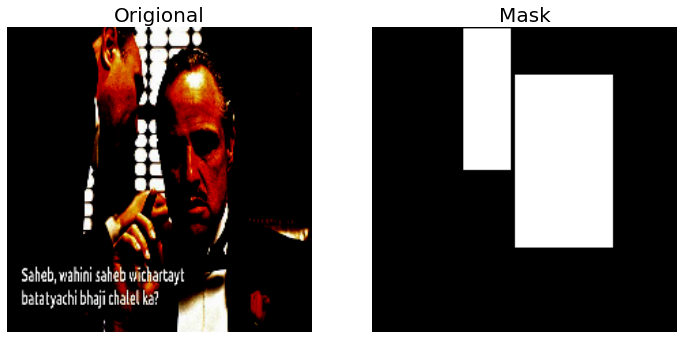

In [54]:
# Displaying random images and its corresponding mask from trainig data
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
img_num = np.random.randint(0, X.shape[0])
ax1.imshow(X[img_num],cmap = 'gray', interpolation = 'bilinear' );
ax2.imshow(masks[img_num],  cmap = 'gray', interpolation = 'bilinear');
ax1.set_title('Origional', fontsize=20)
ax2.set_title('Mask', fontsize=20)
ax1.axis('off')
ax2.axis('off')
plt.show()

Images are displayed along with corresponding mask with same size 2224,224

# Q3. Mask detection model:

● Design a face mask detection model. 

 Hint: Use U-net along with pre-trained transfer learning models

● Design your own Dice Coefficient and Loss function. 

● Train, tune and test the model.

● Evaluate the model using testing data.

In [20]:
# Importing the required library
from tensorflow.keras.models import Model
from tensorflow.keras.layers import UpSampling2D, Reshape, Conv2D, Concatenate, LayerNormalization, LeakyReLU
from tensorflow.keras.applications import MobileNet

In [21]:
# Creating a function for model building using UNET Architecture layers

def create_model(trainable=True):
    # Loading the mobilenet weights used in imagenet and keeping the fully connected layers false
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    # Freezing the layers
    for layer in model.layers:
        layer.trainable = trainable
  
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output
    
    # Upsampling the features
    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)

    return Model(inputs=model.input, outputs=x)

Model is created using a functions

In [22]:
# Calling the final model in final_model object
final_model = create_model()

17227776/17225924 [==============================] - 0s 0us/step
(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)


In [23]:
# Final model summary
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

Model is created using UNET arrchitecture and the size of images are same as set above before training

There are Appx 3.2 M trainable parameters

## Design your own Dice Coefficient and Loss function. 

In [24]:
# Dice Coefficient
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

In [25]:
# Loss function
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [26]:
# Compiling the model
final_model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

In [27]:
# Defining model check point, earlystoping and ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystoping = EarlyStopping(monitor='loss', patience=6, mode='min', verbose=0)
reduce_learning = ReduceLROnPlateau(monitor='loss', patience=6, verbose=1, min_lr=1e-6, mode='min')
modelcheck = ModelCheckpoint('final_model-{loss:.2f}.h5', monitor='loss', verbose=1,save_best_only=True)

callback_list = [earlystoping, reduce_learning, modelcheck]

In [28]:
# Fitting the final model

final_model.fit(X, masks, verbose=1, epochs=50,callbacks=callback_list,batch_size=1)

Epoch 1/50
409/409 [==============================] - 75s 105ms/step - loss: 1.1799 - dice_coefficient: 0.5175

Epoch 00001: loss improved from inf to 1.17987, saving model to final_model-1.18.h5
Epoch 2/50
409/409 [==============================] - 43s 105ms/step - loss: 0.8375 - dice_coefficient: 0.6062

Epoch 00002: loss improved from 1.17987 to 0.83751, saving model to final_model-0.84.h5
Epoch 3/50
409/409 [==============================] - 43s 105ms/step - loss: 0.7216 - dice_coefficient: 0.6454

Epoch 00003: loss improved from 0.83751 to 0.72160, saving model to final_model-0.72.h5
Epoch 4/50
409/409 [==============================] - 43s 105ms/step - loss: 0.6640 - dice_coefficient: 0.6707

Epoch 00004: loss improved from 0.72160 to 0.66398, saving model to final_model-0.66.h5
Epoch 5/50
409/409 [==============================] - 43s 105ms/step - loss: 0.6067 - dice_coefficient: 0.6921

Epoch 00005: loss improved from 0.66398 to 0.60674, saving model to final_model-0.61.h5
Epoc

In [29]:
# Checking the model history
final_model.history.history.keys()

dict_keys(['loss', 'dice_coefficient', 'lr'])

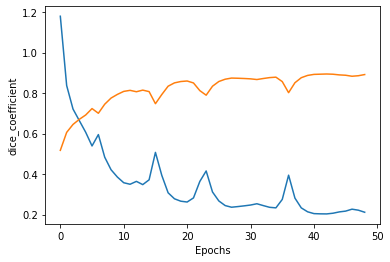

In [30]:
plt.plot(final_model.history.history['loss'])
plt.plot(final_model.history.history['dice_coefficient'])
plt.xlabel('Epochs')
plt.ylabel('dice_coefficient')
plt.show()

The model loss is gradually decreasing and the dice-coefficient has also improved

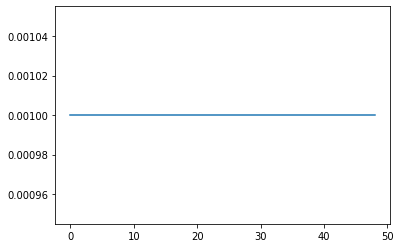

In [31]:
plt.plot(final_model.history.history['lr']);

The learning rate was constant throughout the entire training

## Displaying the test image and the predicted mask for a test image


In [62]:
# Displaying the test image
import tensorflow
test_img = '/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 1Test Data - Prediction Image (1).jpeg'

In [63]:
# Defining a function to normalize the test data
def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = cv2.resize(x, (224,224))
    x = x/255.0
    return x

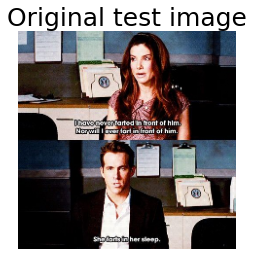

In [64]:
# Displaying the actual test images
test_img = read_image(test_img)
plt.imshow(test_img);
plt.title('Original test image', fontsize=25)
plt.axis('off')
plt.show()

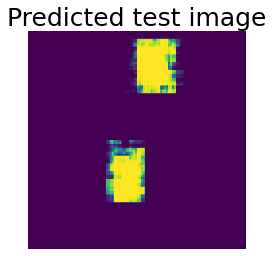

In [65]:
plt.imshow(final_model.predict(x=np.array([test_img]))[0])
plt.title('Predicted test image', fontsize=25)
plt.axis('off')
plt.show()

The trained model has performed very well in predicting the test image as we can see above.

In [70]:
# Converting to html
%cd '/content/drive/'

/content/drive


In [72]:
# !jupyter nbconvert --to html PART_ONE_Project_2_Advanced_Computer_Vision.ipynb